<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/04_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Boosting</h1> 
</strong>

---


<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/boosting.png?raw=true'>
  </a>
</p>

![Boosting](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/Boosting2x.png?raw=true)

__Clone the Repository__

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (324/324), done.
remote: Compressing objects: 100% (293/293), done.
remote: Total 2510 (delta 109), reused 205 (delta 30), pack-reused 2186
Receiving objects: 100% (2510/2510), 304.21 MiB | 32.72 MiB/s, done.
Resolving deltas: 100% (887/887), done.
Checking out files: 100% (1056/1056), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
#sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset


In [4]:
ls

auto.csv   indian_liver_patient.csv               wbc.csv
bikes.csv  indian_liver_patient_preprocessed.csv


# **Boosting**

Boosting refers to an **ensemble method** in which many predictors are trained and ***each predictor learns from the errors of its predecessor***.

**Boosting:**

- Ensemble method combining several __weak learners__ to from a __strong learner__
    - __Weak learner__: Model doing slightly better than radom guessing
        - e.g. __Decision stump__ (CART whose `max depth=1`)

- Train predictors sequentially
Each predictor tries to correct its predecessor

## **AdaBoost**

- Stands for **Adaptive Boosting**.

- Each predictor pays more attention to the instances wrongly predicted by its predecessor, which is achieved by **chaging the weights of training instances** after each individual model.

- Each predictor is assigne a coefficient $α$, which depends on the predictor’s training error.

![adaBoost](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/AdaBoost.png?raw=true)

- Details:
    - Suppose we have $N$ predictors in total.
    - The $predictor_1$ is trained on the initial dataset $(X,y)$, and the training error $e_1$ is determined.

    - We use $e_1$ to determine $α_1$, which is $predictor_1$’s coefficient.

    - $ηα_1$ is then used to determine $W2$ of the training instances for $predictor_2$.

        - Here, __the incorrectly predicted instances will gain a higher weight__, which would force the next predictor to pay more attention to these instances.

    - The above process is repeated sequentially, until $N$ predictors forming the ensemble are trained.


- An important parameter: learning rate $η$.
    - $η∈[0,1]$
    - It is used to shrink the coefficient α of a trained predictor
    - Tradeoff between $η$ and the number of predictors
        - Small $η$ should be compensated by a greater number of predictors.

- Output a final prediction:

    - Classification: aggregates predictions by majority voting. `AdaBoostClassifier`.

    - Regression: aggregates predictions through averaging. `AdaBoostRegressor`


In [5]:
indian = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [6]:
# Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = indian.drop('Liver_disease', axis='columns')
y = indian['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Set seed for reproducibility
SEED=1

# Instantiate dt_clf
dt_clf = DecisionTreeClassifier(max_depth = 2,
                            random_state=SEED)

# Instantiate ada_clf
ada_clf = AdaBoostClassifier(base_estimator = dt_clf, 
                         n_estimators = 180,
                         random_state = 1)

# Fit ada_clf to the training set
ada_clf.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada_clf.predict_proba(X_test)[:, 1]

# Evaluate test-set roc_auc_score
ada_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_clf_roc_auc_score))

ROC AUC score: 0.63


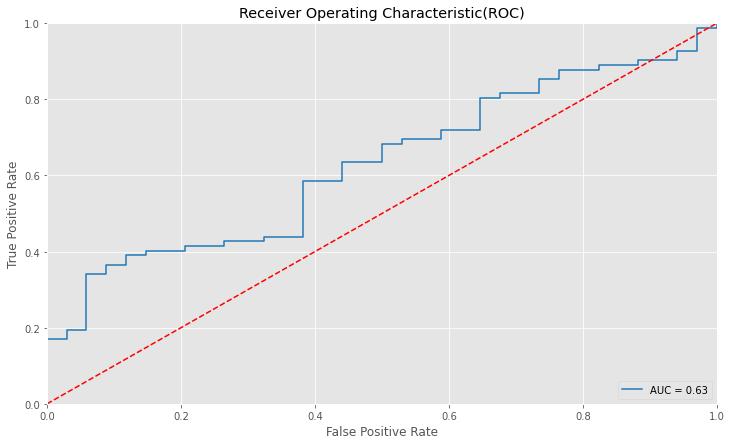

In [7]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
# Compute the probabilities of obtaining the positive class
y_pred_proba = ada_clf.predict_proba(X_test)
preds = y_pred_proba[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
plt.figure(figsize=(12, 7))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, color='tab:blue', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## __Gradient Boosting (GB)__

__Gradient Boosting__

- **Sequential correction** of predecessor’s errors.

- **Does not tweak** the weights of training instances.

- Fit each predictor is trained using its predecessor’s **residual errors** as labels.

- **Gradient Boosted Trees**: a CART is used as a base learner.


__Gradient Boosted Trees for Regression:__

**Details:**

- The ensemble consists $N$ trees.
- ${Tree_1}$ is trained using feature matrix $X$ and the dataset labels $y$.

- The prediction $\hat{y_1}$ are used to determine the training set residual errors $r1$.

- ${Tree_2}$ is then trained using feature matrix $X$ and residual error ${r_1}$ as labels.

- The predicted residuals times learning rate, ${ηr_1}$, is then used to determine the residuals of residuals, which are labeled ${r_2}$

- This process is repeated until all of the $N$ trees forming the ensemble are trained.


__Important parameter: learning rate η__

- ${η∈[0,1]}$

- It is used to shrink the labels of each tree, which is essentially r of the previous trained tree.

- Tradeoff between ${η}$ and the number of predictors.

    - Small ${η}$ should be compensated by a greater number of predictors.



__Shrinkage__

- An important parameter used in training gradient boosted trees is __shrinkage__. In this context, shrinkage refers to the fact that the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate $\eta$, which is a number between 0 and 1.

- Similarly to __AdaBoost__, there's a trade-off between $\eta$ and the number of estimators `n_estimators`. Decreasing the learning rate $\eta$ needs to be compensated by increasing the number of `n_estimators` in order for the ensemble to reach a certain performance.

Ensemble is shrinked after it is multiplied by a learning rate $\eta$.

__Output a final prediction:__
- __Classification:__
- not covered in this course
`GradientBoostingClassifier`
- __Regression:__
When a new instance is available, each tree predicts a label and the final ensemble prediction is given by the formula shown
    - $y_{pred}=y_1+ηr_1+…+ηr_N$
    - `GradientBoostingRegressor`

<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/GB_train.png?raw=true'>
  </a>
</p>

__Define the GB regressor__

We'll now revisit the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset. 

__TASK__
>Our task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a **gradient boosting regressor**.

As a first step, is to instantiate a **gradient boosting regressor**.

In [8]:
bike = pd.read_csv('bikes.csv')
bike.head(2)

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0


In [9]:
# Imports
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X = bike.drop('cnt', axis='columns')
y = bike['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Instantiate gb
gb = GradientBoostingRegressor(max_depth = 4,
                               n_estimators = 200,
                               random_state = 2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.537


## __Stochastic Gradient Boosting (SGB)__

**Gradient Boosting has its limitations:**

- GB involves an **exhaustive search** procedure.

- Each CART is trained to **find the best split points** and **features**, and thus may lead to CARTs using the same split points and maybe the same features.

__Stochastic Gradient Boosting helps avoid this from happening:__

- Each tree is trained on a __random subset__ of rows of the training data.

- The sampled instances (***40%-80% of the training set***) are sampled **without** replacement.

- Features are sampled (without replacement) when choosing split points.

- **Result**: **further ensemble diversity**.

- **Effect**: adding further variance to the ensemble of trees.



__Stochastic Gradient Boosting: Training__

<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/SGD.png?raw=true'>
  </a>
</p>

- Residual errors are multiplied by the learning rate $\eta$ and are fed to the next tree in ensemble.

- Process is repeated sequentially until all the trees in the ensemble are trained.

**Details of SGB:**

- We **randomly sampl**e only a **fraction** of the training set **without replacement** to feed into the *first predictor* ${Tree_1}$.

- Then, when it comes to **features**, we **ramdomly sample** a fraction of the features **without replacement** when considering makeing a **split**.

- Once a tree is trained, **predictions** ($\hat{y_1}$) are made and the **residual errors** ${r_1}$ on the training set can be calculated.

- These **residual errors** are then multiplied by **learning rate** ${\eta}$ and fed to the __next__ tree in the ensemble.

- This procedure is repeated sequentially until all the trees in the ensemble are trained. ***The prediction procedure of SGB is similar to GB.***

In [10]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate sgbr
sgbr = GradientBoostingRegressor(
    max_depth = 4, 
    subsample = 0.9, # set the fraction of training set to use in each tree
    max_features = 0.75, # set the fraction of features to use when making a split
    n_estimators = 200,
    random_state = 2)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Compute test set MSE
mse_test = MSE(y_pred, y_test)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))
# output:
    # Test set RMSE of sgbr: 49.979

# The stochastic gradient boosting regressor achieves 
# a lower test set RMSE than the gradient boosting regressor 
# (which was 52.065)

Test set RMSE of sgbr: 47.260


$\color{red}{\textbf{NOTE:}}$

The **Stochastic Gradient Boosting Regressor** achieves a lower test set **RMSE** than the gradient boosting regressor.

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>